In [1]:
import numpy as np

# Evalutation

## Investigating Model Predictions

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [3]:
# Create the dataset
X, y = load_boston(return_X_y=True)

# Fit regression model
model = RandomForestRegressor()
model.fit(X, y)

# Predict
predictions = model.predict(X)

### Median Relative Error (MRE)

`evaluation.MRE` calculates the median relative error / median absolute percentage error (MAPE) of `predictions` given `ground_truth`.

In [4]:
from evaluation import MRE

In [5]:
MRE(ground_truth=y, predictions=predictions)

0.029095904095904235

Setting `plot = True` also plots the distribution of errors:

0.029095904095904235

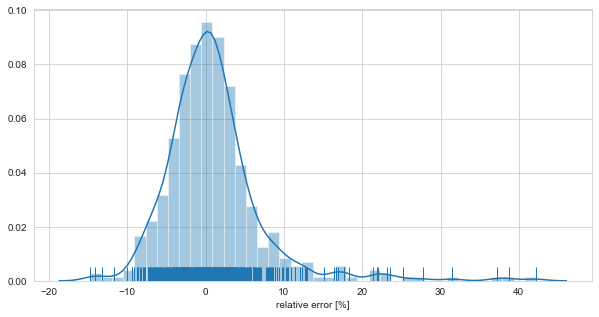

In [6]:
MRE(ground_truth=y, predictions=predictions, plot=True)

Setting `target_log1p_transform = True` assumes that both `ground_truth` as well as `predictions` have been `log1p` transformed:

0.025396235598474093

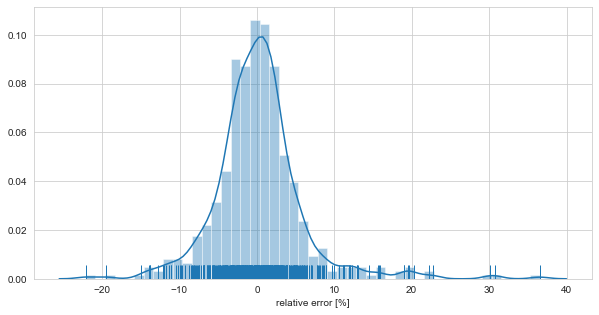

In [7]:
# Log1p transform the target
y_log = np.log1p(y)
# Predict
predictions_log = model.fit(X, y_log).predict(X)
# Calculate MRE and plot
MRE(ground_truth=y_log, predictions=predictions_log, target_log1p_transform=True, plot=True)

### Percentile Relative Error (PRE)

`evaluation.PRE` calculates the percentile relative error of `predictions` given `ground_truth`.
It thus gives what fraction of the predictions have a relative error no larger than `percentile`.

In [8]:
from evaluation import PRE

In [12]:
PRE(ground_truth=y, predictions=predictions, percentile=0.05)

0.7450592885375494

`evaluation.MRE` gives the median (50% percentile) relative error, that is, 50% of all samples have a relative error larger than the MRE (and the other 50% less or equal to it).
Setting `percentile` to MRE thus gives 50%:

In [14]:
PRE(ground_truth=y, predictions=predictions, percentile=MRE(ground_truth=y, predictions=predictions))

0.5

Setting `target_log1p_transform = True` assumes that both `ground_truth` as well as `predictions` have been `log1p` transformed:

In [15]:
PRE(ground_truth=y_log, predictions=predictions_log, percentile=0.05, target_log1p_transform=True)

0.7608695652173914

### Plotting Residuals

`evaluation.plot_residuals` plots residuals against the predictions given ground_truth, including histograms.

In [19]:
from evaluation import plot_residuals

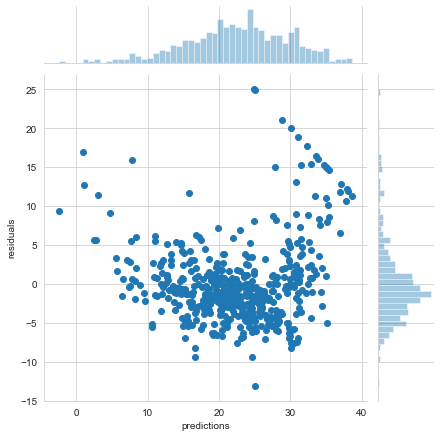

In [20]:
plot_residuals(ground_truth=y, predictions=predictions)

`bins` controlls the number of bins in the histograms:

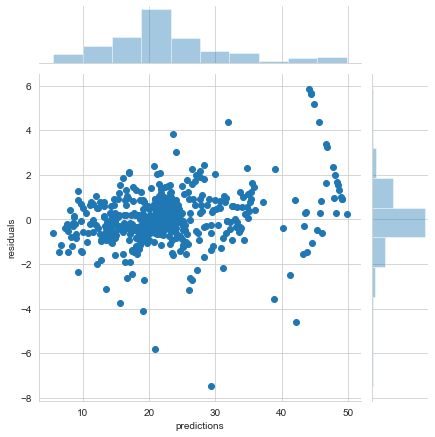

In [6]:
plot_residuals(ground_truth=y, predictions=predictions, bins=10)